In [66]:
import tensorflow as tf
print(tf.__version__)

1.15.5


In [67]:
import sys
print(sys.version)

3.7.5 (default, Dec  9 2021, 17:04:37) 
[GCC 8.4.0]


### Data preprocessing

#### Dataset check

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'/project/kc20230915003/src'

##### dataset load

In [56]:
excel_file = '/project/kc20230915003/src/1. BREAST13V5_Older.xlsx'

sheet_name = 'BREAST13'

csv_file_path = '/project/kc20230915003/src/breast_old.csv'

df = pd.read_excel(excel_file, sheet_name=sheet_name)

df.to_csv(csv_file_path, index=False)

In [2]:
csv_file_path = '/project/kc20230915003/src/breast_young_colname.csv'

df_new = pd.read_csv(csv_file_path)

##### comparision

In [11]:
compare_csv_file_path = '/project/kc20230915003/src/breast_old_colname.csv'

df = pd.read_csv(compare_csv_file_path)

In [3]:
csv_file_path = '/project/kc20230915003/src/breast_young_colname.csv'

df_new = pd.read_csv(csv_file_path)

In [12]:
old=df['All_cause_of_death'].value_counts(normalize=True)*100
print(old)

0    94.362343
1     5.637657
Name: All_cause_of_death, dtype: float64


In [13]:
young=df_new['All_cause_of_death'].value_counts(normalize=True)*100
print(young)

0    96.632783
1     3.367217
Name: All_cause_of_death, dtype: float64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TCODE                  1827 non-null   object 
 1   MCODE                  1827 non-null   int64  
 2   AGE                    1827 non-null   int64  
 3   T_SIZE                 1827 non-null   int64  
 4   ER                     1827 non-null   int64  
 5   PR                     1827 non-null   int64  
 6   HER2                   1827 non-null   int64  
 7   AJCC7_STAGE            1827 non-null   object 
 8   Height                 1827 non-null   int64  
 9   Weight                 1827 non-null   int64  
 10  BMI                    1827 non-null   int64  
 11  Waist                  1827 non-null   int64  
 12  SBP                    1827 non-null   int64  
 13  DBP                    1827 non-null   int64  
 14  Protein                1827 non-null   int64  
 15  Hemo

In [68]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TCODE                  1827 non-null   object 
 1   MCODE                  1827 non-null   int64  
 2   AGE                    1827 non-null   int64  
 3   T_SIZE                 1827 non-null   int64  
 4   ER                     1827 non-null   int64  
 5   PR                     1827 non-null   int64  
 6   HER2                   1827 non-null   int64  
 7   AJCC7_STAGE            1827 non-null   object 
 8   Height                 1827 non-null   int64  
 9   Weight                 1827 non-null   int64  
 10  BMI                    1827 non-null   int64  
 11  Waist                  1827 non-null   int64  
 12  SBP                    1827 non-null   int64  
 13  DBP                    1827 non-null   int64  
 14  Protein                1827 non-null   int64  
 15  Hemo

In [69]:
df_new.isnull().sum()

TCODE                    0
MCODE                    0
AGE                      0
T_SIZE                   0
ER                       0
PR                       0
HER2                     0
AJCC7_STAGE              0
Height                   0
Weight                   0
BMI                      0
Waist                    0
SBP                      0
DBP                      0
Protein                  0
Hemoglobin               0
FBS                      0
Total_cholesterol        0
SGOT                     0
SGPT                     0
GGT                      0
Triglycerides            0
High_lipoprotein         0
Low_lipoprotein          0
Serum_creatine           0
EGF                      0
smoking_status           0
alcohol                  0
VPA                      0
MPA                      0
walking                  0
Atrial_fibrillation      0
CKD                      0
COPD                     0
Diabetes                 0
DVT                      0
Dyslipidaemia            0
H

In [4]:
print(df_new.shape)

(1574, 45)


In [5]:
print(df_new.describe())

             MCODE          AGE       T_SIZE           ER           PR  \
count  1574.000000  1574.000000  1574.000000  1574.000000  1574.000000   
mean      3.062262    44.345616    22.460610     0.994282     0.810038   
std       0.861664     4.353571    16.439665     2.577341     1.708622   
min       3.000000    29.000000     1.000000     0.000000     0.000000   
25%       3.000000    42.000000    12.000000     1.000000     0.000000   
50%       3.000000    45.000000    18.000000     1.000000     1.000000   
75%       3.000000    48.000000    27.000000     1.000000     1.000000   
max      17.000000    50.000000   138.000000    30.000000    30.000000   

              HER2       Height       Weight          BMI        Waist  ...  \
count  1574.000000  1574.000000  1574.000000  1574.000000  1574.000000  ...   
mean      0.287802   154.783990    53.500635    22.678526    70.457433  ...   
std       0.452882     5.447347     9.223216     2.734877     8.227172  ...   
min       0.00000

In [6]:
print(df_new.duplicated().sum())

0


In [15]:
df_new.shape

(1574, 45)

In [16]:
df.shape

(1827, 45)

In [17]:
df.columns

Index(['TCODE', 'MCODE', 'AGE', 'T_SIZE', 'ER', 'PR', 'HER2', 'AJCC7_STAGE',
       'Height', 'Weight', 'BMI', 'Waist', 'SBP', 'DBP', 'Protein',
       'Hemoglobin', 'FBS', 'Total_cholesterol', 'SGOT', 'SGPT', 'GGT',
       'Triglycerides', 'High_lipoprotein', 'Low_lipoprotein',
       'Serum_creatine', 'EGF', 'smoking_status', 'alcohol', 'VPA', 'MPA',
       'walking', 'Atrial_fibrillation', 'CKD', 'COPD', 'Diabetes', 'DVT',
       'Dyslipidaemia', 'Heart_failure', 'Hypertension', 'Liver_disease',
       'Myocardial_infarction', 'PVD', 'STROKE', 'Survival_time',
       'All_cause_of_death'],
      dtype='object')

In [18]:
df_new.columns

Index(['TCODE', 'MCODE', 'AGE', 'T_SIZE', 'ER', 'PR', 'HER2', 'AJCC7_STAGE',
       'Height', 'Weight', 'BMI', 'Waist', 'SBP', 'DBP', 'Protein',
       'Hemoglobin', 'FBS', 'Total_cholesterol', 'SGOT', 'SGPT', 'GGT',
       'Triglycerides', 'High_lipoprotein', 'Low_lipoprotein',
       'Serum_creatine', 'EGF', 'smoking_status', 'alcohol', 'VPA', 'MPA',
       'walking', 'Atrial_fibrillation', 'CKD', 'COPD', 'Diabetes', 'DVT',
       'Dyslipidaemia', 'Heart_failure', 'Hypertension', 'Liver_disease',
       'Myocardial_infarction', 'PVD', 'STROKE', 'Survival_time',
       'All_cause_of_death'],
      dtype='object')

#### Dataset encoding

In [ ]:
'''
# young original data
X= df_new[['Topography_CODE', 'Morphology_CODE', 'AGE', 'T_SIZE', 'ER', 'PR','HER2', 'AJCC7_STAGE', 'Height', 'Weight', 'BMI', 
           'Waist_circumference','Systolic_blood_pressure', 'Diastolic_blood_pressure','Protein_in_urine', 'Hemoglobin_level', 
           'Fasting_blood_sugar', 'Total_cholesterol', 'Serum_glutamic_oxaloacetic_transaminase', 'Serum_glutamic_pyruvic_transaminase', 
           'Gamma_glutamyl_transpeptidase', 'Triglycerides', 'High_density_lipoprotein', 'Low_density_lipoprotein', 'Serum_creatine', 
           'Estimated_glomerular_filtration_rate','smoking_status', 'Weekly_alchol_consumption(days)',
           'Vigorous_physical_activity(days_in_a_week)','Moderate_physical_activity(days_in_a_week)',
           'Physical_activity_walking(days_in_a_week)', 'Atrial_fibrillation','Chronic_kidney_disease', 
           'Chronic_obstructive_pulmonary_disease', 'Diabetes', 'Deep_venous_thrombosis', 'Dyslipidaemia', 'Heart_failure',
           'Hypertension', 'Liver_disease', 'Myocardial_infarction', 'Peripoheral_vascualr_disease', 'STROKE']]

y=df_new[['Survival_time','All_cause_of_death']]
'''

In [20]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# new colnames
X= df_new[['TCODE', 'MCODE', 'AGE', 'T_SIZE', 'ER', 'PR', 'HER2', 'AJCC7_STAGE',
           'Height', 'Weight', 'BMI', 'Waist', 'SBP', 'DBP', 'Protein',
           'Hemoglobin', 'FBS', 'Total_cholesterol', 'SGOT', 'SGPT', 'GGT',
           'Triglycerides', 'High_lipoprotein', 'Low_lipoprotein',
           'Serum_creatine', 'EGF', 'smoking_status', 'alcohol', 'VPA', 'MPA',
           'walking', 'Atrial_fibrillation', 'CKD', 'COPD', 'Diabetes', 'DVT',
           'Dyslipidaemia', 'Heart_failure', 'Hypertension', 'Liver_disease',
           'Myocardial_infarction', 'PVD', 'STROKE']]

y=df_new[['Survival_time','All_cause_of_death']]

In [21]:
categorical_columns = ['TCODE', 'MCODE']

categorical_order_columns = ['AJCC7_STAGE', 'Height', 'Weight','Waist','Protein','smoking_status','ER','PR', 'HER2', 
                             'Atrial_fibrillation','CKD', 'COPD','Diabetes', 'DVT', 'Dyslipidaemia', 'Heart_failure',
                             'Hypertension', 'Liver_disease', 'Myocardial_infarction','PVD', 'STROKE']

onehot_encoder = OneHotEncoder(sparse=False)

X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_columns]))
X_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)

X_continuous= X.drop(columns=categorical_columns)
X=pd.concat([X_continuous, X_encoded], axis=1)

label_encoder = LabelEncoder()

for column in categorical_order_columns:
    X[column]=label_encoder.fit_transform(X[column])

In [22]:
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)

In [23]:
X

,AGE,T_SIZE,ER,PR,HER2,AJCC7_STAGE,Height,Weight,BMI,Waist,SBP,DBP,Protein,Hemoglobin,FBS,Total_cholesterol,SGOT,SGPT,GGT,Triglycerides,High_lipoprotein,Low_lipoprotein,Serum_creatine,EGF,smoking_status,...,CKD,COPD,Diabetes,DVT,Dyslipidaemia,Heart_failure,Hypertension,Liver_disease,Myocardial_infarction,PVD,STROKE,TCODE_C500,TCODE_C501,TCODE_C502,TCODE_C503,TCODE_C504,TCODE_C505,TCODE_C506,TCODE_C508,TCODE_C509,MCODE_3,MCODE_4,MCODE_5,MCODE_16,MCODE_17
0,43,16,1,1,0,0,1,0,20,1,101,72,0,11.9,92,163,26,17,42,91,59,85,0.7,97,0,...,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,42,4,1,1,1,0,0,2,26,3,126,73,0,14.9,93,163,25,32,15,137,68,67,0.7,97,0,...,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44,55,1,1,0,3,0,1,21,0,100,60,0,11.4,78,146,18,10,14,66,65,67,0.7,96,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,46,6,1,1,0,0,1,2,23,1,119,75,0,13.2,93,278,17,10,15,166,65,179,0.7,96,1,...,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,29,4,1,1,0,0,1,1,20,0,116,76,0,13.3,86,117,27,22,28,34,62,48,0.9,79,0,...,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,42,15,1,1,0,0,1,3,27,1,129,82,0,13.4,104,199,18,19,20,49,54,135,0.7,98,0,...,0,0,0,0,0,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1570,47,11,1,1,0,0,0,1,23,1,133,70,0,12.4,84,142,22,23,16,93,36,87,1.0,63,0,...,0,0,0,0,1,0,0,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1571,34,9,1,0,0,0,2,2,23,1,102,65,0,12.8,79,189,13,13,12,44,71,109,0.6,121,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1572,48,40,1,0,1,2,0,3,30,3,120,70,0,13.7,132,266,35,40,39,154,93,142,1.1,56,0,...,0,0,1,0,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 55 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AGE                    1574 non-null   int64  
 1   T_SIZE                 1574 non-null   int64  
 2   ER                     1574 non-null   int64  
 3   PR                     1574 non-null   int64  
 4   HER2                   1574 non-null   int64  
 5   AJCC7_STAGE            1574 non-null   int64  
 6   Height                 1574 non-null   int64  
 7   Weight                 1574 non-null   int64  
 8   BMI                    1574 non-null   int64  
 9   Waist                  1574 non-null   int64  
 10  SBP                    1574 non-null   int64  
 11  DBP                    1574 non-null   int64  
 12  Protein                1574 non-null   int64  
 13  Hemoglobin             1574 non-null   float64
 14  FBS                    1574 non-null   int64  
 15  Tota

#### Dataset split

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [26]:
X_train.to_csv('/project/kc20230915003/src/X_train_young.csv', index=False)
X_test.to_csv('/project/kc20230915003/src/X_test_young.csv' , index=False)
y_train.to_csv('/project/kc20230915003/src/y_train_young.csv',index=False)
y_test.to_csv('/project/kc20230915003/src/y_test_young.csv', index=False)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1259, 55)
(315, 55)
(1259, 2)
(315, 2)


#### Dataset structure

In [41]:
X_train =pd.read_csv('/project/kc20230915003/src/X_train_old.csv')
X_test = pd.read_csv('/project/kc20230915003/src/X_test_old.csv')
y_train =pd.read_csv('/project/kc20230915003/src/y_train_old.csv')
y_test = pd.read_csv('/project/kc20230915003/src/y_test_old.csv')

In [42]:
y_train.columns

Index(['Survival_time', 'All_cause_of_death'], dtype='object')

In [43]:
new_order = ['All_cause_of_death', 'Survival_time']

In [44]:
y_train = y_train[new_order]
y_test = y_test[new_order]

In [45]:
y_train.columns

Index(['All_cause_of_death', 'Survival_time'], dtype='object')

In [46]:
def convert_to_structured_array(data):
    structured_data = np.zeros(data.shape[0], dtype = {'names': ('All_cause_of_death', 'Survival_time'), 'formats': ('bool', 'f8')})
    structured_data['All_cause_of_death'] = data['All_cause_of_death'].astype(bool)
    structured_data['Survival_time'] = data['Survival_time'].astype(float)
    return structured_data

y_train_structured = convert_to_structured_array(y_train)
y_test_structured = convert_to_structured_array(y_test)

In [47]:
print(y_train_structured[:5])

[(False, 1825.) (False, 1825.) (False, 1825.) (False, 1825.)
 (False, 1825.)]


### Survival mortality prediction

#### RSF

In [48]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance


n_iterations = 10 
all_results = []

for i in range(n_iterations):
    rsf = RandomSurvivalForest(n_estimators = 100, random_state = i)
    rsf.fit(X_train, y_train_structured)
    
    y_pred = rsf.predict(X_test)
    c_index = concordance_index_censored(y_test_structured['All_cause_of_death'], y_test_structured['Survival_time'], y_pred)[0]
    
    result = permutation_importance(rsf, X_test, y_test_structured, n_repeats=10, random_state=i)
    feature_importances = result.importances_mean
    features = X_train.columns
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "feature": feature,
            "Importance": importance
        })
        
results_df = pd.DataFrame(all_results)
results_df.to_csv("C-index_FI_rsf_old.csv", index=False)

mean_c_index = np.mean(c_index)
std_c_index = np.std(c_index)

print(f"C-index mean: {mean_c_index:.4f}")
print(f"C-index STD: {std_c_index:.4f}")

C-index mean: 0.7929
C-index STD: 0.0000


#### GB-Survival

In [35]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

n_iterations = 10 
all_results = []

for i in range(n_iterations):
    gb_model = GradientBoostingSurvivalAnalysis(n_estimators = 100, random_state = i)
    gb_model.fit(X_train, y_train_structured)
    
    y_pred = gb_model.predict(X_test)
    c_index = concordance_index_censored(y_test_structured['All_cause_of_death'], y_test_structured['Survival_time'], y_pred)[0]
    
    feature_importances = gb_model.feature_importances_
    features = X_train.columns
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "feature": feature,
            "Importance": importance
        })
        
results_df = pd.DataFrame(all_results)
results_df.to_csv("C-index_FI_gb-survival_young_2.csv", index=False)

mean_c_index = np.mean(c_index)
std_c_index = np.std(c_index)

print(f"C-index mean: {mean_c_index:.4f}")
print(f"C-index STD: {std_c_index:.4f}")

C-index mean: 0.6665
C-index STD: 0.0000


#### EST

In [36]:
from sksurv.ensemble import ExtraSurvivalTrees
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance


n_iterations = 10 
all_results = []

for i in range(n_iterations):
    est_model = ExtraSurvivalTrees(n_estimators = 100, random_state = i)
    est_model.fit(X_train, y_train_structured)
    
    y_pred = est_model.predict(X_test)
    c_index = concordance_index_censored(y_test_structured['All_cause_of_death'], y_test_structured['Survival_time'], y_pred)[0]
    
    result = permutation_importance(est_model, X_test, y_test_structured, n_repeats=10, random_state=i)
    feature_importances = result.importances_mean
    features = X_train.columns
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "feature": feature,
            "Importance": importance
        })
        
results_df = pd.DataFrame(all_results)
results_df.to_csv("C-index_FI_est_young_sclaed.csv", index=False)

mean_c_index = np.mean(c_index)
std_c_index = np.std(c_index)

print(f"C-index mean: {mean_c_index:.4f}")
print(f"C-index STD: {std_c_index:.4f}")

C-index mean: 0.8719
C-index STD: 0.0000


#### SVM

In [28]:
X_train =pd.read_csv('/project/kc20230915003/src/X_train_old.csv')
X_test = pd.read_csv('/project/kc20230915003/src/X_test_old.csv')
y_train =pd.read_csv('/project/kc20230915003/src/y_train_old.csv')
y_test = pd.read_csv('/project/kc20230915003/src/y_test_old.csv')

In [29]:
from sksurv.kernels import clinical_kernel
from sksurv.svm import FastKernelSurvivalSVM
from sksurv.metrics import concordance_index_censored
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_approximation import Nystroem
from sklearn.inspection import permutation_importance


y_train_structured = np.array([(bool(e), t) for e,t in zip(y_train["All_cause_of_death"], y_train["Survival_time"])],
                              dtype=[('All_cause_of_death', '?'), ('Survival_time', '<f8')])
y_test_structured = np.array([(bool(e), t) for e,t in zip(y_test["All_cause_of_death"], y_test["Survival_time"])],
                              dtype=[('All_cause_of_death', '?'), ('Survival_time', '<f8')])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nystroem = Nystroem(kernel='rbf', gamma=1.0, n_components=100)

X_train_kernel = nystroem.fit_transform(X_train_scaled)
X_test_kernel = nystroem.transform(X_test_scaled)

n_iterations = 10
all_results = []

for i in range(n_iterations):
    
    fkssvm = FastKernelSurvivalSVM(rank_ratio=1.0, random_state=i)
    
    fkssvm.fit(X_train_kernel, y_train_structured)
    
    y_pred = fkssvm.predict(X_test_kernel)
    c_index = concordance_index_censored(y_test_structured['All_cause_of_death'], y_test_structured['Survival_time'],-y_pred)[0]
    
    baseline_c_index = c_index
    feature_importances = []
    
    for feature in range(X_test_kernel.shape[1]):
        X_test_permuted = X_test_kernel.copy()
        np.random.shuffle(X_test_permuted[:, feature])
        
        y_pred_permuted = fkssvm.predict(X_test_permuted)
        c_index_permuted = concordance_index_censored(y_test_structured['All_cause_of_death'], y_test_structured['Survival_time'],-y_pred_permuted)[0]
        importance = baseline_c_index - c_index_permuted
        feature_importances.append(importance)
        
    features = X_train.columns
    
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "Feature": feature,
            "Importance": importance
        })
        
results_df = pd.DataFrame(all_results)
results_df.to_csv("c-index_and_FI_fkssvm.csv", index=False)

mean_c_index = np.mean(results_df["C-index"])
std_c_index = np.std(results_df["C-index"])

print(f"c-index mean: {mean_c_index:.4f}")
print(f"c-index std: {std_c_index:.4f}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: ConvergenceWarning: Optimization did not converge: Warning: Desired error not necessarily achieved due to precision loss.


c-index mean: 0.4733
c-index std: 0.0000


#### Penalized CoxPH

In [39]:
# Lasso, ElasticNet

from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler

X_train =pd.read_csv('/project/kc20230915003/src/X_train_young.csv')
X_test = pd.read_csv('/project/kc20230915003/src/X_test_young.csv')
y_train =pd.read_csv('/project/kc20230915003/src/y_train_young.csv')
y_test = pd.read_csv('/project/kc20230915003/src/y_test_young.csv')

new_order = ['All_cause_of_death', 'Survival_time']
y_train = y_train[new_order]
y_test = y_test[new_order]


def convert_to_structured_array(data):
    structured_data = np.zeros(data.shape[0], dtype = {'names': ('All_cause_of_death', 'Survival_time'), 'formats': ('bool', 'f8')})
    structured_data['All_cause_of_death'] = data['All_cause_of_death'].astype(bool)
    structured_data['Survival_time'] = data['Survival_time'].astype(float)
    return structured_data

y_train_structured = convert_to_structured_array(y_train)
y_test_structured = convert_to_structured_array(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


def run_coxph(X_train, y_train, X_test, y_test, penalty, l1_ratio=None):
    if penalty == "lasso":
        model = CoxnetSurvivalAnalysis(l1_ratio=1.0, alphas=None)
    elif penalty == "elasticnet":
        model = CoxnetSurvivalAnalysis(l1_ratio=0.5, alphas=None)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    c_index = concordance_index_censored(y_test['All_cause_of_death'], y_test['Survival_time'], y_pred)[0]
    
    result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
    feature_importances = result.importances_mean
    features = X_train.columns
    
    all_results = []
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "feature": feature,
            "Importance": importance
        })
    
    return all_results, c_index

lasso_results = []
elasticnet_results = []
n_iterations = 10

for i in range(n_iterations):
    #lasso
    results, c_index = run_coxph(X_train_scaled, y_train_structured, X_test_scaled, y_test_structured, 'lasso')
    lasso_results.extend(results)
    
    #ElasticNet
    results, c_index = run_coxph(X_train_scaled, y_train_structured, X_test_scaled, y_test_structured, 'elasticnet', l1_ratio=0.5)
    elasticnet_results.extend(results)

lasso_df = pd.DataFrame(lasso_results)
elasticnet_df = pd.DataFrame(elasticnet_results)

lasso_df.to_csv("c-index_FI_coxph-L_young_2.csv", index = False)
elasticnet_df.to_csv('c-index_FI_coxph-E_young_2.csv', index=False)

lasso_c_indices =  [result['C-index'] for result in lasso_results]
elasticnet_c_indices = [result['C-index'] for result in elasticnet_results]

mean_c_index_lasso = np.mean(lasso_c_indices)
std_c_index_lasso = np.std(lasso_c_indices)

mean_c_index_elasticnet = np.mean(elasticnet_c_indices)
std_c_index_elasticnet = np.std(elasticnet_c_indices)

print(f"lasso c-index mean: {mean_c_index_lasso:.4f}, std:{std_c_index_lasso:.4f}")
print(f"elasticnet c-index mean: {mean_c_index_elasticnet:.4f}, std:{std_c_index_elasticnet:.4f}")

lasso c-index mean: 0.7386, std:0.0000
elasticnet c-index mean: 0.7261, std:0.0000


In [111]:
# Ridge

from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.metrics import concordance_index_censored
from sklearn.inspection import permutation_importance

X_train =pd.read_csv('/project/kc20230915003/src/preprocessed_data/X_train_young.csv')
X_test = pd.read_csv('/project/kc20230915003/src/preprocessed_data/X_test_young.csv')
y_train =pd.read_csv('/project/kc20230915003/src/preprocessed_data/y_train_young.csv')
y_test = pd.read_csv('/project/kc20230915003/src/preprocessed_data/y_test_young.csv')

new_order = ['All_cause_of_death', 'Survival_time']
y_train = y_train[new_order]
y_test = y_test[new_order]


def convert_to_structured_array(data):
    structured_data = np.zeros(data.shape[0], dtype = {'names': ('All_cause_of_death', 'Survival_time'), 'formats': ('bool', 'f8')})
    structured_data['All_cause_of_death'] = data['All_cause_of_death'].astype(bool)
    structured_data['Survival_time'] = data['Survival_time'].astype(float)
    return structured_data

y_train_structured = convert_to_structured_array(y_train)
y_test_structured = convert_to_structured_array(y_test)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)


def run_coxph_ridge(X_train, y_train, X_test, y_test, iteration):
    
    model = CoxnetSurvivalAnalysis(l1_ratio=1e-10)
        
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    c_index = concordance_index_censored(y_test['All_cause_of_death'], y_test['Survival_time'], y_pred)[0]
    
    feature_importances = model.coef_
    features = X_train.columns
    
    
    all_results = []
    
    for feature, importance in zip(features, feature_importances):
        all_results.append({
            "Iteration": i+1,
            "C-index": c_index,
            "feature": feature,
            "Importance": importance
        })
    
    return all_results, c_index

ridge_results = []
n_iterations = 10

for i in range(n_iterations):
    results, c_index = run_coxph_ridge(X_train_scaled, y_train_structured, X_test_scaled, y_test_structured, i)
    ridge_results.extend(results)


ridge_df = pd.DataFrame(ridge_results)

ridge_df.to_csv("c-index_FI_coxph-R_young.csv", index = False)

c_index_values =  [result['C-index'] for result in ridge_results]


mean_c_index_ridge= np.mean(c_index_values)
std_c_index_ridge = np.std(c_index_values)


print(f"ridge c-index mean: {mean_c_index_ridge:.4f}, std:{std_c_index_ridge:.4f}")

ridge c-index mean: 0.5000, std:0.0000


### Importance Features

In [57]:
importance_df = pd.read_csv('/project/kc20230915003/src/C-index_FI_coxph-L_young.csv')

feature_group = importance_df.groupby('feature').agg({'Importance':['mean', 'count']}).reset_index()

feature_group.columns = ['Feature', 'Importance_mean', 'Importance_count']

sorted_features = feature_group.sort_values('Importance_mean', ascending=False)

top_features = sorted_features.head(10)

top_features.to_csv('top_features_coxph-L_young.csv', index=False)

print(top_features)

              Feature  Importance_mean  Importance_count
47  Total_cholesterol         0.185542                10
1         AJCC7_STAGE         0.114619                10
21    Low_lipoprotein         0.113089                10
48      Triglycerides         0.076802                10
18   High_lipoprotein         0.050262                10
5                COPD         0.036649                10
29                 PR         0.024285                10
52            alcohol         0.023681                10
38         TCODE_C501         0.022271                10
45         TCODE_C509         0.013733                10


### Visualization heatmap

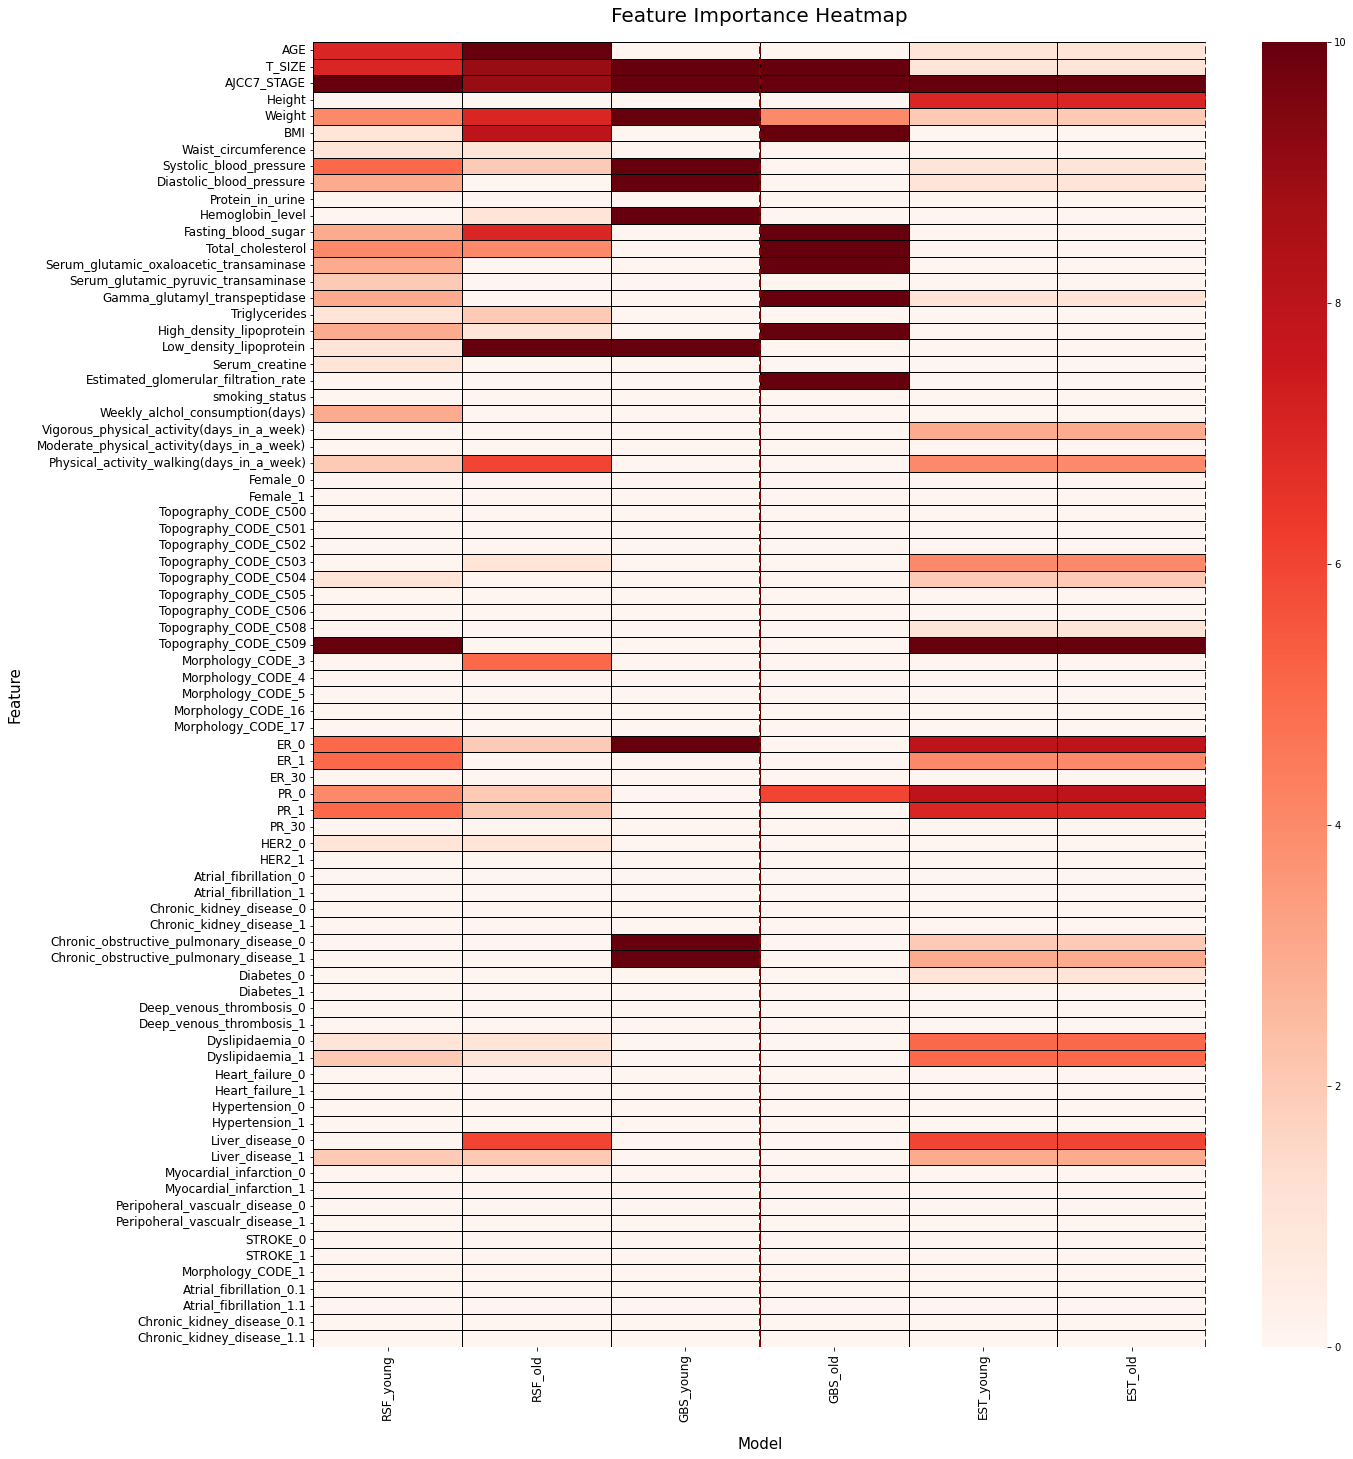

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_paths = [
    '/project/kc20230915003/src/C-index_FI/C-index_FI_rsf_younger.csv',
    '/project/kc20230915003/src/C-index_FI/C-index_FI_rsf_older.csv',
    '/project/kc20230915003/src/C-index_FI/C-index_FI_gb-survival_younger.csv',
    '/project/kc20230915003/src/C-index_FI/C-index_FI_gb-survival_older.csv',
    '/project/kc20230915003/src/C-index_FI/C-index_FI_est_younger.csv',
    '/project/kc20230915003/src/C-index_FI/C-index_FI_est_younger.csv'
]

model_names = [
    'RSF_young',
    'RSF_old',
    'GBS_young',
    'GBS_old',
    'EST_young',
    'EST_old'
]

all_data = []

for file_path, model_name in zip(file_paths, model_names):
    df = pd.read_csv(file_path)
    df['Model'] = model_name
    all_data.append(df)
    
combined_data = pd.concat(all_data)

combined_data['Top10'] = combined_data.groupby(['Model', 'Iteration'])['Importance'].rank(method='first', ascending=False) <=10

feature_counts = combined_data[combined_data['Top10']].groupby(['feature', 'Model']).size().unstack(fill_value=0)

all_features = combined_data['feature'].unique()
feature_counts = feature_counts.reindex(all_features, fill_value=0)


feature_counts = feature_counts.T.reindex(model_names).T

feature_counts = feature_counts.fillna(0).astype(int)


plt.figure(figsize = (20,24))
sns.heatmap(feature_counts, annot=False, cmap='Reds', cbar=True, linewidths=.5, linecolor='black')


group_boundaries = [3,6]
for boundary in group_boundaries:
    plt.axvline(x=boundary, color='darkred', linestyle='--', linewidth=2)

plt.title('Feature Importance Heatmap', fontsize=20, pad=20)
plt.xlabel('Model', fontsize=15, labelpad=15)
plt.ylabel('Feature', fontsize=15, labelpad=15)

plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

plt.show()